# Data Explore

## Import Python Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Collection

In [ ]:
#salary = pd.read_csv('SalaryBackup.csv')
salary = pd.read_csv("Salary.csv", na_values = "?")

In [ ]:
salary.head(10)

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
5,Private,73,333676,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,118,50,United-States,low
6,Local-gov,65,24824,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,793,40,United-States,low
7,Private,37,96330,Some-college,10.0,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,193,40,United-States,low
8,Private,53,47396,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,427,40,United-States,low
9,NaN,61,166855,Bachelors,13.0,Married-civ-spouse,NaN,Husband,White,Male,0,0,164,10,United-States,low


In [ ]:
salary.isnull().sum()

work_type          1836
age                   0
weight                0
education             0
education_years       9
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
investment_gain       0
investment_loss       0
company_size          0
weekly_hours          0
country             583
salary_range          0
dtype: int64

In [ ]:
#original shape of dataset
print("Shape",salary.shape)

Shape (32561, 16)


In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30725 non-null  object 
 1   age              32561 non-null  int64  
 2   weight           32561 non-null  int64  
 3   education        32561 non-null  object 
 4   education_years  32552 non-null  float64
 5   marital_status   32561 non-null  object 
 6   occupation       30718 non-null  object 
 7   relationship     32561 non-null  object 
 8   race             32561 non-null  object 
 9   sex              32561 non-null  object 
 10  investment_gain  32561 non-null  int64  
 11  investment_loss  32561 non-null  int64  
 12  company_size     32561 non-null  int64  
 13  weekly_hours     32561 non-null  int64  
 14  country          31978 non-null  object 
 15  salary_range     32561 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 4.0+ MB


In [ ]:
new_salary.groupby('salary_range').size()

salary_range
high     7506
low     22647
dtype: int64

*Comment for the size of "salary_range":*<br>
- Maybe need to rebalance the class **(avoid imbalanced class result)**

## Numerical Feaures Analysis

In [ ]:
salary.describe() 

,age,weight,education_years,investment_gain,investment_loss,company_size,weekly_hours
count,32561.000000,3.256100e+04,32552.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080609,1077.648844,87.303830,500.930838,40.437456
std,13.640433,1.055500e+05,2.572762,7385.292085,402.960219,285.784842,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,5.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,254.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,502.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,745.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,1000.000000,99.000000


Summary of the describtion of the data:
---
1. Age   : 17 - 90 years old
2. Weight: 1.376900e+04 - 1.484705e+06
3. Education_years: 1 - 16 years
4. investment_gain: 0.00 - 99999.00
5. investment_loss: 0.00 - 4356.00
6. company_size   : 5 - 1000 employees
7. weekly_hours   : 1 - 99 hours

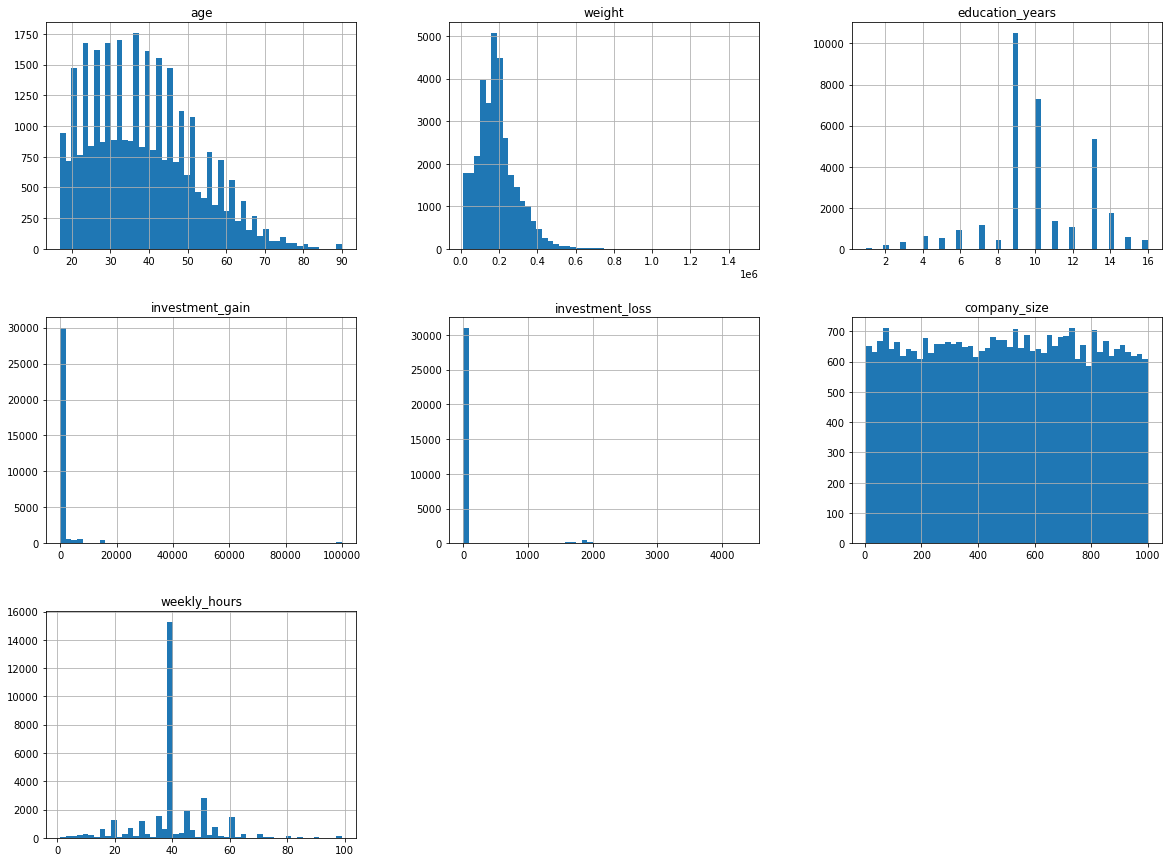

In [ ]:
salary.hist(bins = 50, figsize = (20,15))
plt.show() 

Distribution data questions: <br>
    a. How is the distribution data - heavy tail issue<br>
        - 3 attributes (weight, investment_gain, investment_loss)<br>
    b. What is peculiar about the graph<br>
        - <br>
    c. Features that have different scales<br>
        - weekly_hours

## Categorical Features Analysis

In [ ]:
salary.value_counts()

work_type    age  weight  education     education_years  marital_status      occupation         relationship   race                sex     investment_gain  investment_loss  company_size  weekly_hours  country        salary_range
Federal-gov  17   99893   11th          7.0              Never-married       Adm-clerical       Not-in-family  Black               Female  0                1602             415           40            United-States  low             1
Private      46   216164  HS-grad       9.0              Married-civ-spouse  Handlers-cleaners  Husband        White               Male    0                0                266           40            United-States  low             1
                  224559  HS-grad       9.0              Married-civ-spouse  Transport-moving   Husband        Black               Male    0                0                300           40            United-States  low             1
                  224202  Some-college  10.0             Married-civ-

Formulate data question of the: <br>
    a. How many possible values for the categorical feature<br>
        - 10 attributes<br>
    b. What is the most frequent value<br>
        - <br>
    c. What is the least frequent value<br>
        - <br>

# Data Visualization

In [ ]:
# a list with all missing value formats
#missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
new_data = pd.read_csv("Salary.csv", na_values = "?")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30725 non-null  object 
 1   age              32561 non-null  int64  
 2   weight           32561 non-null  int64  
 3   education        32561 non-null  object 
 4   education_years  32552 non-null  float64
 5   marital_status   32561 non-null  object 
 6   occupation       30718 non-null  object 
 7   relationship     32561 non-null  object 
 8   race             32561 non-null  object 
 9   sex              32561 non-null  object 
 10  investment_gain  32561 non-null  int64  
 11  investment_loss  32561 non-null  int64  
 12  company_size     32561 non-null  int64  
 13  weekly_hours     32561 non-null  int64  
 14  country          31978 non-null  object 
 15  salary_range     32561 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 4.0+ MB


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30725 non-null  object 
 1   age              32561 non-null  int64  
 2   weight           32561 non-null  int64  
 3   education        32561 non-null  object 
 4   education_years  32552 non-null  float64
 5   marital_status   32561 non-null  object 
 6   occupation       30718 non-null  object 
 7   relationship     32561 non-null  object 
 8   race             32561 non-null  object 
 9   sex              32561 non-null  object 
 10  investment_gain  32561 non-null  int64  
 11  investment_loss  32561 non-null  int64  
 12  company_size     32561 non-null  int64  
 13  weekly_hours     32561 non-null  int64  
 14  country          31978 non-null  object 
 15  salary_range     32561 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 4.0+ MB


In [ ]:
salary.corr()

,age,weight,education_years,investment_gain,investment_loss,company_size,weekly_hours
age,1.000000,-0.076646,0.036495,0.077674,0.057775,0.002589,0.068756
weight,-0.076646,1.000000,-0.043220,0.000432,-0.010252,0.004007,-0.018768
education_years,0.036495,-0.043220,1.000000,0.122649,0.079678,-0.007389,0.148050
investment_gain,0.077674,0.000432,0.122649,1.000000,-0.031615,0.004572,0.078409
investment_loss,0.057775,-0.010252,0.079678,-0.031615,1.000000,0.003726,0.054256
company_size,0.002589,0.004007,-0.007389,0.004572,0.003726,1.000000,0.000768
weekly_hours,0.068756,-0.018768,0.148050,0.078409,0.054256,0.000768,1.000000


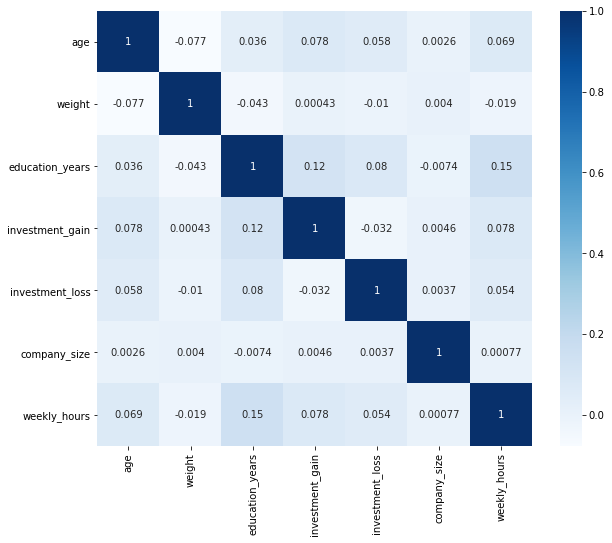

In [ ]:
plt.figure(figsize =(10,8))
sns.heatmap(salary.corr(), square=True, annot=True, cbar=True, cmap="Blues");

### Positive Correlation
- Age and Investment Gain
- Age and Investment Loss
- Weekly Hours and Age
- Weekly Hours and Education Years
- Education Years and Investment Gain
- Education Years and Investment Lost

### Negative Correlation
- Age and Weight
- Weight and Investment Lost
- Weight and Weekly Hours
- Investment Gain and Investment Loss
- Education Years and Company Size


In [ ]:
salary.head(5)

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low


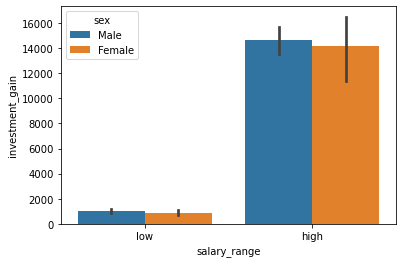

In [ ]:
sns.barplot(x='salary_range',y='investment_gain',data=salary,estimator=np.std,hue='sex')

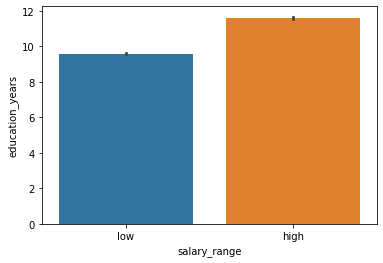

In [ ]:
sns.barplot(x='salary_range',y='education_years',data=salary)

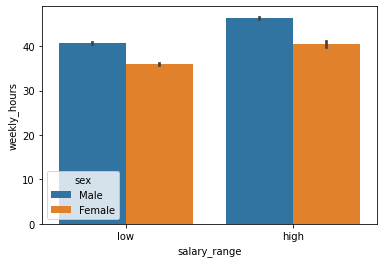

In [ ]:
sns.barplot(x='salary_range',y='weekly_hours',data=salary, hue='sex')

Text(0.5, 1.0, '- Investment Gain of Different Races -')

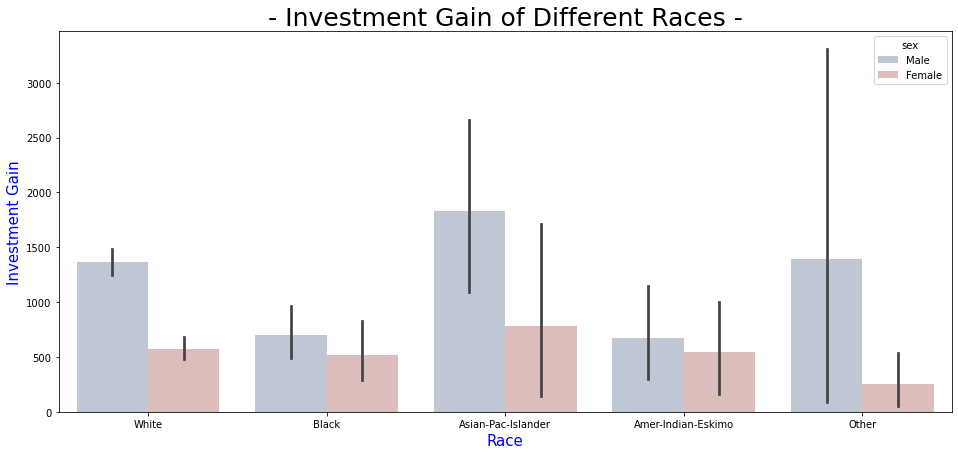

In [ ]:
plt.figure(figsize =(16,7))
sns.barplot(x='race',y='investment_gain',data=salary, hue='sex',palette='vlag')

plt.xlabel('Race',fontsize = 15,color='blue')
plt.ylabel('Investment Gain',fontsize = 15,color='blue')
plt.title('- Investment Gain of Different Races -',fontsize = 25)

#### Asian Pacific Islanders has the highest investment gain while American Indian Eskimo has the lowest

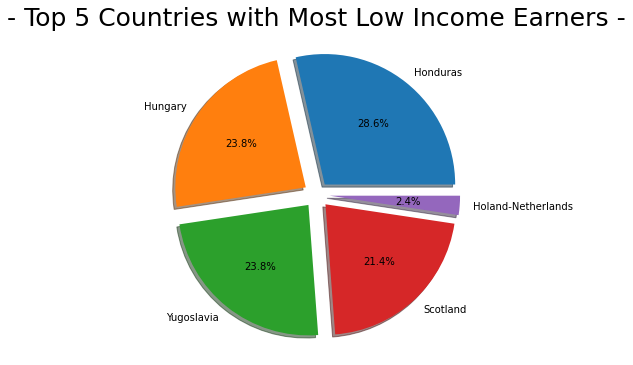

In [ ]:
co = salary.groupby('salary_range')
top5 = co['country'].value_counts().tail(5)

x = top5
y = top5['low'].index.tolist()

fig, ex = plt.subplots(figsize=(10, 6))
explode = (0.1,0.1,0.1,0.1,0.1)
plt.pie(x, explode=explode,labels=y, autopct='%1.1f%%', shadow=True)
plt.title('- Top 5 Countries with Most Low Income Earners -',fontsize = 25)
plt.show()

### Honduras has the highest number of people that are considered in the low salary range

Text(0.5, 1.0, '- Top 5 Countries with Most Number of High Income Earners -')

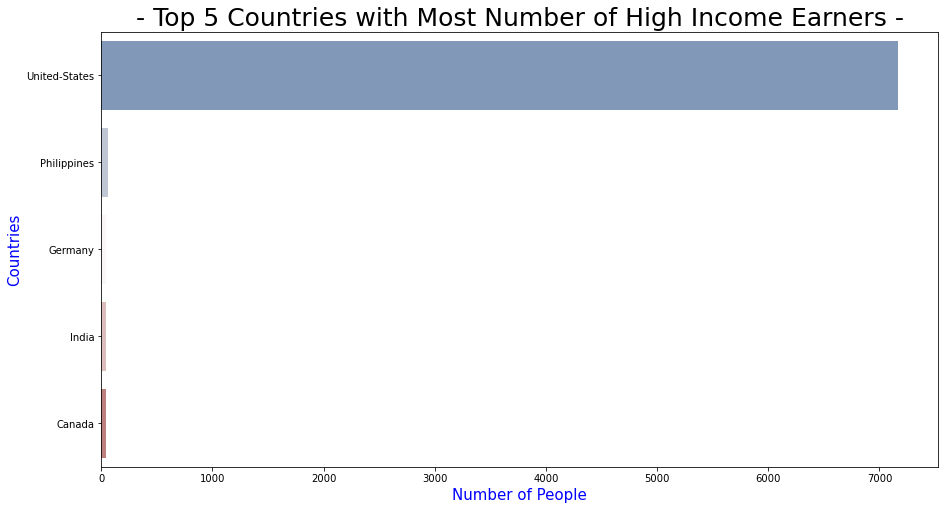

In [ ]:
co = salary.groupby('salary_range')
top5 = co['country'].value_counts().head(5)

x = top5
y = top5['high'].index.tolist()

plt.figure(figsize =(15,8))
sns.barplot(x=x,y=y,data=salary,palette='vlag')

plt.xlabel('Number of People',fontsize = 15,color='blue')
plt.ylabel('Countries',fontsize = 15,color='blue')
plt.title('- Top 5 Countries with Most Number of High Income Earners -',fontsize = 25)

[Text(0, 0, '7th-8th'),
 Text(0, 0, '11th'),
 Text(0, 0, 'HS-grad'),
 Text(0, 0, 'Some-college'),
 Text(0, 0, 'Bachelors'),
 Text(0, 0, 'Assoc-acdm'),
 Text(0, 0, '10th'),
 Text(0, 0, 'Preschool'),
 Text(0, 0, 'Assoc-voc'),
 Text(0, 0, '12th'),
 Text(0, 0, 'Masters'),
 Text(0, 0, '5th-6th'),
 Text(0, 0, 'Doctorate'),
 Text(0, 0, 'Prof-school'),
 Text(0, 0, '9th'),
 Text(0, 0, '1st-4th')]

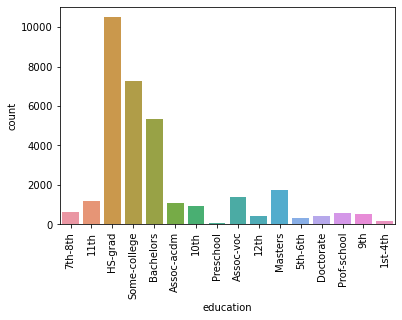

In [ ]:
plot = sns.countplot(salary['education'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

[Text(0, 0, 'low'), Text(0, 0, 'high')]

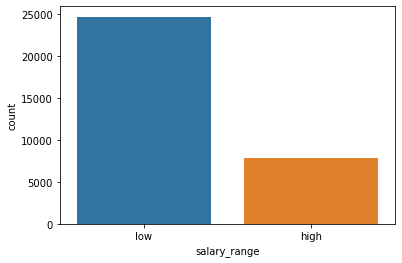

In [ ]:
plot = sns.countplot(salary['salary_range'])
plot.set_xticklabels(plot.get_xticklabels())

[Text(0, 0, 'United-States'),
 Text(0, 0, 'Philippines'),
 Text(0, 0, 'Mexico'),
 Text(0, 0, 'El-Salvador'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Cuba'),
 Text(0, 0, 'Guatemala'),
 Text(0, 0, 'South'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Peru'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Puerto-Rico'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Jamaica'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Haiti'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Laos'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Dominican-Republic'),
 Text(0, 0, 'Vietnam'),
 Text(0, 0, 'Cambodia'),
 Text(0, 0, 'Columbia'),
 Text(0, 0, 'England'),
 Text(0, 0, 'Nicaragua'),
 Text(0, 0, 'Hungary'),
 Text(0, 0, 'Trinadad&Tobago'),
 Text(0, 0, 'Ireland'),
 Text(0, 0, 'Scotland'),
 Text(0, 0, 'Honduras'),
 Text(0, 0, 'Ecuador'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Taiwan'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Hong'),
 Text(0, 0, 'Outlying-US(Guam-USVI-etc)'),
 Text(0, 0, 'Yugoslavia'),
 Text(0, 0, 'Thailand'),
 Tex

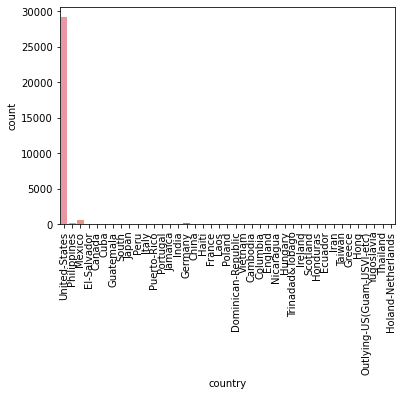

In [ ]:
plot = sns.countplot(salary['country'])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

---

# Data Preprocessing

### Handle Missing Data

In [ ]:
salary.isnull().sum()

work_type          1836
age                   0
weight                0
education             0
education_years       9
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
investment_gain       0
investment_loss       0
company_size          0
weekly_hours          0
country             583
salary_range          0
dtype: int64

In [ ]:
#Drop First - for new_salary 
import copy
new_salary = copy.deepcopy(salary)
new_salary.dropna(inplace = True)
print('Original Attribute Shape:',salary.shape)
print('Clean Attribute Shape:',new_salary.shape)

Original Attribute Shape: (32561, 16)
Clean Attribute Shape: (30153, 16)


* Result: 32561-30153 = 2408 missing values (have been removed)

In [ ]:
new_salary.head(10)

,work_type,age,weight,education,education_years,marital_status,occupation,relationship,race,sex,investment_gain,investment_loss,company_size,weekly_hours,country,salary_range
0,Private,19,216804,7th-8th,4.0,Never-married,Other-service,Own-child,White,Male,0,0,825,33,United-States,low
1,Private,23,207546,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,865,40,United-States,low
2,Private,41,253759,HS-grad,9.0,Never-married,Sales,Unmarried,Black,Female,0,0,727,40,United-States,low
3,Private,28,180928,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,5013,0,328,55,United-States,low
4,Private,17,208463,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0,0,977,20,United-States,low
5,Private,73,333676,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,118,50,United-States,low
6,Local-gov,65,24824,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,793,40,United-States,low
7,Private,37,96330,Some-college,10.0,Never-married,Exec-managerial,Unmarried,Black,Female,0,0,193,40,United-States,low
8,Private,53,47396,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,427,40,United-States,low
10,Local-gov,30,44566,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,833,80,United-States,low


In [ ]:
new_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30153 entries, 0 to 32558
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   work_type        30153 non-null  object 
 1   age              30153 non-null  int64  
 2   weight           30153 non-null  int64  
 3   education        30153 non-null  object 
 4   education_years  30153 non-null  float64
 5   marital_status   30153 non-null  object 
 6   occupation       30153 non-null  object 
 7   relationship     30153 non-null  object 
 8   race             30153 non-null  object 
 9   sex              30153 non-null  object 
 10  investment_gain  30153 non-null  int64  
 11  investment_loss  30153 non-null  int64  
 12  company_size     30153 non-null  int64  
 13  weekly_hours     30153 non-null  int64  
 14  country          30153 non-null  object 
 15  salary_range     30153 non-null  object 
dtypes: float64(1), int64(6), object(9)
memory usage: 3.9+ MB


---

### Separate output vector from input matrix 

In [ ]:
#Drop targeted variable from the matrix X as the input matrix Y 
X = new_salary.drop('salary_range', axis = 1)
y = new_salary['salary_range']

In [ ]:
#Show the shape and type class of the dataFrame for matrix X and Y
print("Shape original dataFrame", salary.shape)
print("X shape",  X.shape, "type = ", type(X))
print("Y shape",  y.shape, "type = ", type(y))

Shape original dataFrame (32561, 16)
X shape (30153, 15) type =  <class 'pandas.core.frame.DataFrame'>
Y shape (30153,) type =  <class 'pandas.core.series.Series'>


### Split the Dataset - Training, Testing

In [ ]:
#Load the python library - sklearn  
from sklearn.model_selection import train_test_split

#Split dataset into train and test set
#train_test_split(X, y, test_size = 0.2, random_state = 30) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

### Split the input matrix - numerical and categorical sets

In [ ]:
cat_attribute = ['work_type','education', 'marital_status', 'occupation', 'relationship','race','sex','country']
X_train_num = X_train.drop(cat_attribute, axis = 1)
X_train_cat = X_train[cat_attribute]

### Standardize numeric data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_train_num)       
X_train_num_tr = scaler.transform(X_train_num)

In [ ]:
print('Mean:\n',X_train_num_tr.mean (axis=0))
print('\nStandard Deviation:\n',X_train_num_tr.std (axis=0))

Mean:
 [ 1.58474418e-16  4.00604478e-17  2.25045456e-16  5.89124232e-18
  0.00000000e+00  6.11216390e-17 -2.40362687e-16]

Standard Deviation:
 [1. 1. 1. 1. 1. 1. 1.]


In [ ]:
X_train_num_tr  #transformed into ndArray

array([[-1.47877606,  2.14605934, -0.43726317, ..., -0.21714456,
        -1.09027426,  0.75014643],
       [ 0.72888682, -1.41653869, -0.43726317, ..., -0.21714456,
         1.16431632, -0.07987046],
       [ 2.40366555,  0.83156301, -0.43726317, ..., -0.21714456,
        -1.04469156, -0.07987046],
       ...,
       [ 1.10951834,  0.94934365, -0.43726317, ..., -0.21714456,
        -0.64847269,  0.75014643],
       [ 0.65276051,  2.17742417,  1.13023009, ..., -0.21714456,
        -0.52575003, -0.07987046],
       [-0.18462886, -0.22687043,  1.5221034 , ..., -0.21714456,
         1.36417894,  0.75014643]])

### One-hot encode categorical data

In [ ]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24122 entries, 12305 to 6405
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   work_type       24122 non-null  object
 1   education       24122 non-null  object
 2   marital_status  24122 non-null  object
 3   occupation      24122 non-null  object
 4   relationship    24122 non-null  object
 5   race            24122 non-null  object
 6   sex             24122 non-null  object
 7   country         24122 non-null  object
dtypes: object(8)
memory usage: 1.7+ MB


In [ ]:
#Seperate each of the Categorical Attribute for One Hot Encoding
X_train_cat1=X_train_cat.work_type
X_train_cat2=X_train_cat.education
X_train_cat3=X_train_cat.marital_status
X_train_cat4=X_train_cat.occupation
X_train_cat5=X_train_cat.relationship
X_train_cat6=X_train_cat.race
X_train_cat7=X_train_cat.sex
X_train_cat8=X_train_cat.country

In [ ]:
#One hot Encoding for Training Set
from sklearn.preprocessing import LabelBinarizer


#FIXME!:Convert These to Loops!

#Instantaneous the LabelBinarizer Object for each Category
lb_encoder=LabelBinarizer()
cat1_encoder=LabelBinarizer()
cat2_encoder=LabelBinarizer()
cat3_encoder=LabelBinarizer()
cat4_encoder=LabelBinarizer()
cat5_encoder=LabelBinarizer()
cat6_encoder=LabelBinarizer()
cat7_encoder=LabelBinarizer()
cat8_encoder=LabelBinarizer()

#Create the Label Binarizer Encoder based on Training Set Values
cat1_encoder.fit(X_train_cat1)
cat2_encoder.fit(X_train_cat2)
cat3_encoder.fit(X_train_cat3)
cat4_encoder.fit(X_train_cat4)
cat5_encoder.fit(X_train_cat5)
cat6_encoder.fit(X_train_cat6)
cat7_encoder.fit(X_train_cat7)
cat8_encoder.fit(X_train_cat8)

#Return the One Hot Encoded value as another Variable
X_train_cat_1=cat1_encoder.transform(X_train_cat1)
X_train_cat_2=cat2_encoder.transform(X_train_cat2)
X_train_cat_3=cat3_encoder.transform(X_train_cat3)
X_train_cat_4=cat4_encoder.transform(X_train_cat4)
X_train_cat_5=cat5_encoder.transform(X_train_cat5)
X_train_cat_6=cat6_encoder.transform(X_train_cat6)
X_train_cat_7=cat7_encoder.transform(X_train_cat7)
X_train_cat_8=cat8_encoder.transform(X_train_cat8)

In [ ]:
print("These are the number of different values per category")
print(X_train_cat_1.shape)
print(X_train_cat_2.shape)
print(X_train_cat_3.shape)
print(X_train_cat_4.shape)
print(X_train_cat_5.shape)
print(X_train_cat_6.shape)
print(X_train_cat_7.shape)
print(X_train_cat_8.shape)

These are the number of different values per category
(24122, 7)
(24122, 16)
(24122, 7)
(24122, 14)
(24122, 6)
(24122, 5)
(24122, 1)
(24122, 41)


In [ ]:
#Combine all One Hot Encoded Category Lable in to one Numpy Array
combine=np.hstack((X_train_cat_1,X_train_cat_2,X_train_cat_3,X_train_cat_4,X_train_cat_5,X_train_cat_6,X_train_cat_7,X_train_cat_8))
combine.shape

(24122, 97)

In [ ]:
#Combine Categorical and Numerical Data Together for Training Set

#Original Traning Set
X_train_tr=np.hstack((X_train_num,combine))

print(X_train_tr.shape)          #Severly Inflate the Attribute Count

#Make sure the Samples are the same for X and y!
print(y_train.shape)

(24122, 104)
(24122,)


In [ ]:
y_train.value_counts()

low     18112
high     6010
Name: salary_range, dtype: int64

*Observation: May cause Imbalanced Class result

## Preprocessing on Test set

*The preprocessing steps are almost same with training set

In [ ]:
#Seperate Numerical and Categorical Data for Processing
cat_attribute = ['work_type','education', 'marital_status', 'occupation', 'relationship','race','sex','country']
X_test_num = X_test.drop(cat_attribute, axis = 1)
X_test_cat = X_test[cat_attribute]
print(X_test_num.shape)
print(X_test_cat.shape)

(6031, 7)
(6031, 8)


### Standardize on Test Set 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_test_num)       
X_test_num_tr = scaler.transform(X_test_num)

In [ ]:
print('Mean:\n',X_test_num_tr.mean (axis=0))
print('\nStandard Deviation:\n',X_test_num_tr.std (axis=0))
X_test_num_tr  #transformed into ndArray

### One Hot Encoding on Test Set

In [ ]:
#Seperate each of the Categorical Attribute for One Hot Encoding
X_test_cat1=X_test_cat.work_type
X_test_cat2=X_test_cat.education
X_test_cat3=X_test_cat.marital_status
X_test_cat4=X_test_cat.occupation
X_test_cat5=X_test_cat.relationship
X_test_cat6=X_test_cat.race
X_test_cat7=X_test_cat.sex
X_test_cat8=X_test_cat.country

In [ ]:
#One hot Encoding for Testing Set
from sklearn.preprocessing import LabelBinarizer

#Instantaneous the LabelBinarizer Object for each Category
lb_encoder=LabelBinarizer()
cat1_encoder=LabelBinarizer()
cat2_encoder=LabelBinarizer()
cat3_encoder=LabelBinarizer()
cat4_encoder=LabelBinarizer()
cat5_encoder=LabelBinarizer()
cat6_encoder=LabelBinarizer()
cat7_encoder=LabelBinarizer()
cat8_encoder=LabelBinarizer()

#Create the Label Binarizer Encoder based on Testing Set Values
cat1_encoder.fit(X_test_cat1)
cat2_encoder.fit(X_test_cat2)
cat3_encoder.fit(X_test_cat3)
cat4_encoder.fit(X_test_cat4)
cat5_encoder.fit(X_test_cat5)
cat6_encoder.fit(X_test_cat6)
cat7_encoder.fit(X_test_cat7)
cat8_encoder.fit(X_test_cat8)

#Return the One Hot Encoded value as another Variable
X_test_cat_1=cat1_encoder.transform(X_test_cat1)
X_test_cat_2=cat2_encoder.transform(X_test_cat2)
X_test_cat_3=cat3_encoder.transform(X_test_cat3)
X_test_cat_4=cat4_encoder.transform(X_test_cat4)
X_test_cat_5=cat5_encoder.transform(X_test_cat5)
X_test_cat_6=cat6_encoder.transform(X_test_cat6)
X_test_cat_7=cat7_encoder.transform(X_test_cat7)
X_test_cat_8=cat8_encoder.transform(X_test_cat8)

In [ ]:
print("These are the number of different values per category")
print(X_test_cat_1.shape)
print(X_test_cat_2.shape)
print(X_test_cat_3.shape)
print(X_test_cat_4.shape)
print(X_test_cat_5.shape)
print(X_test_cat_6.shape)
print(X_test_cat_7.shape)
print(X_test_cat_8.shape)

These are the number of different values per category
(6031, 7)
(6031, 16)
(6031, 7)
(6031, 14)
(6031, 6)
(6031, 5)
(6031, 1)
(6031, 40)


In [ ]:
#Combine all One Hot Encoded Category Lable in to one Numpy Array
combine_test=np.hstack((X_test_cat_1,X_test_cat_2,X_test_cat_3,X_test_cat_4,X_test_cat_5,X_test_cat_6,X_test_cat_7,X_test_cat_8))
combine_test.shape

(6031, 96)

### Finalize Test Set

In [ ]:
#Combine Categorical and Numerical Data Together for Testing Dataset
X_test_tr=np.hstack((X_test_num,combine_test))
#X_test_tr_std=np.hstack((X_test_num_std,combine_test))

print(X_test_tr.shape) 
print(y_test.shape)        #Make Sure the Sample Count on Both are the Same

(6031, 103)
(6031,)


In [ ]:
print("Just the Summarize and Check,These are the information per array")
print()
print('Original Dataset')
print('Salary',new_salary.shape)
print()
print('Preprocessed and Combined Training Set')
print()
print('X_train_tr',X_train_tr.shape)

#print('X_train_tr_std',X_train_tr_std.shape)
print('y_train',y_train.shape)
print()
print('Preprocessed and Combined Testing Set')
print('X_test_tr',X_test_tr.shape)
#print('X_test_tr_std',X_test_tr_std.shape)
print('y_test',y_test.shape)

print('Make sure both X,Y have same no of sample and Train/Test have same number of attribute')

Just the Summarize and Check,These are the information per array

Original Dataset
Salary (30153, 16)

Preprocessed and Combined Training Set

X_train_tr (24122, 104)
y_train (24122,)

Preprocessed and Combined Testing Set
X_test_tr (6031, 103)
y_test (6031,)
Make sure both X,Y have same no of sample and Train/Test have same number of attribute


### Data Preprocessing End
---